In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot

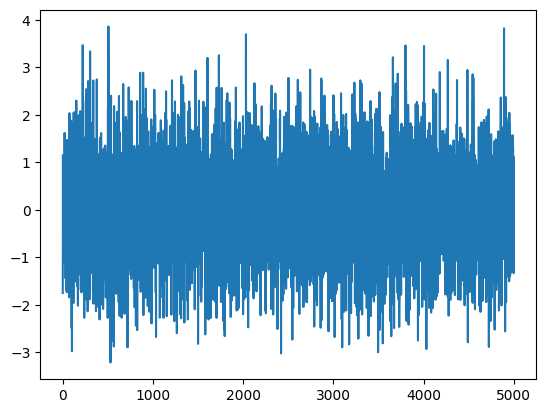

In [16]:
np.random.seed(100)
noise = np.random.normal(0,1,5000)
# plot noise
plt.plot(noise)

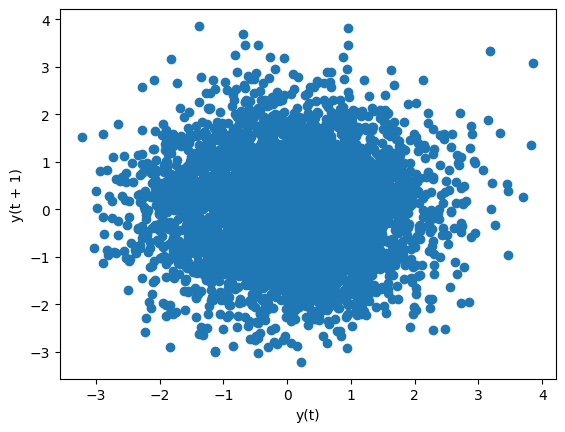

In [17]:
# plot lag plot
lag_plot(pd.Series(noise), lag=1)
plt.show()

(-0.05, 0.15)

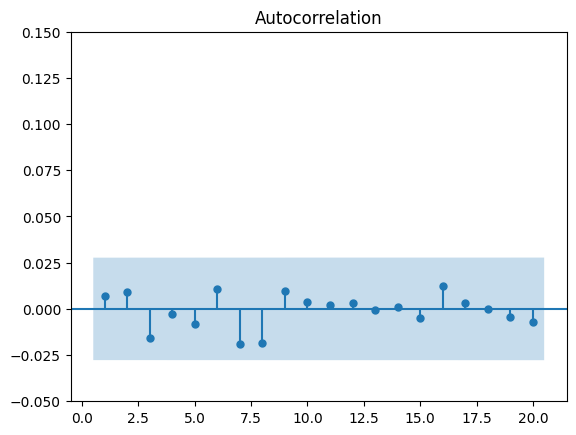

In [18]:
fig = plot_acf(noise, lags=20, zero=False)
plt.ylim(-0.05, 0.15)

shaded region means that statisticly these values are not different from zero so correlation is 0

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

its tool for quantification of correlation, in erljung box test null hypotesis is that there is no correlation up to certain lag

In [22]:
acorr_ljungbox(noise, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,8.336363,0.989398


In [24]:
acorr_ljungbox(noise, lags=20, return_df=True)

,lb_stat,lb_pvalue
1,0.229938,0.631569
2,0.623022,0.732340
3,1.907348,0.591858
4,1.946470,0.745604
5,2.290745,0.807625
6,2.845835,0.827933
7,4.660490,0.701315
8,6.384800,0.604212
9,6.846002,0.653149
10,6.925453,0.732463


tests for stationarity

In [25]:
from statsmodels.tsa.stattools import adfuller, kpss

In [26]:
adfuller(noise) # null hypothesis is that the time series is non-stationary

(-70.23025939421296,
 0.0,
 0,
 4999,
 {'1%': -3.431658793968827,
  '5%': -2.862118345383404,
  '10%': -2.567077853953267},
 14281.458777106282)

first line is test statistics, the second line is pvalue

In [27]:
kpss(noise) # null hypothesis is that the time series is stationary

C:\Users\user\AppData\Local\Temp\ipykernel_9344\3284304129.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(noise) # null hypothesis is that the time series is stationary


(0.0753718043007087,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [30]:
walk = np.cumsum(noise)

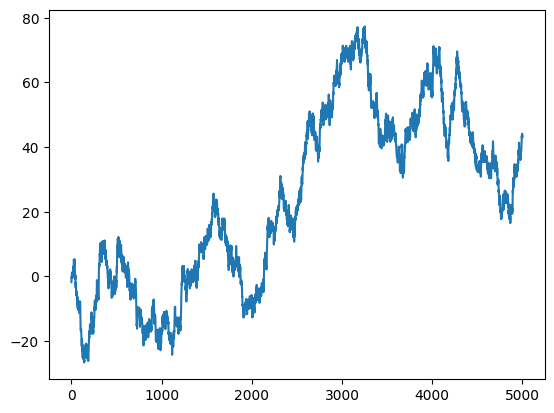

In [31]:
plt.plot(walk)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

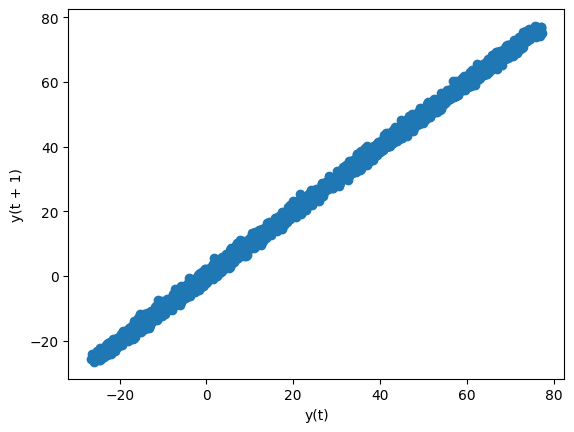

In [32]:
lag_plot(pd.Series(walk), lag=1)

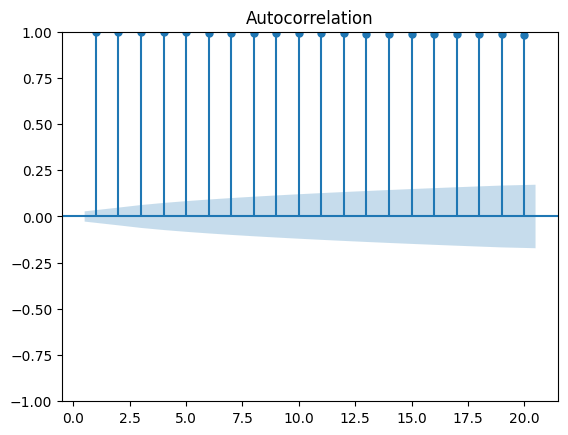

In [33]:
fig=plot_acf(walk, lags=20, zero=False)

In [35]:
acorr_ljungbox(walk, lags=20, return_df=True)

,lb_stat,lb_pvalue
1,4994.871660,0.0
2,9982.579155,0.0
3,14963.008150,0.0
4,19936.365831,0.0
5,24902.811090,0.0
6,29862.487204,0.0
7,34815.243495,0.0
8,39761.321775,0.0
9,44701.031548,0.0
10,49634.289021,0.0


In [36]:
adfuller(walk)

(-1.3659693311260457,
 0.5984777968865603,
 0,
 4999,
 {'1%': -3.431658793968827,
  '5%': -2.862118345383404,
  '10%': -2.567077853953267},
 14279.956349414848)

In [38]:
kpss(walk)

C:\Users\user\AppData\Local\Temp\ipykernel_9344\3745320389.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(walk)


(8.189015385881412,
 0.01,
 42,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

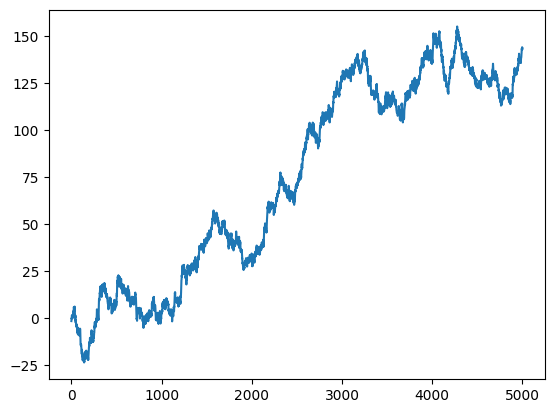

In [63]:
driff = 0.02
drift_walk = np.cumsum(noise + driff)
plt.plot(drift_walk)

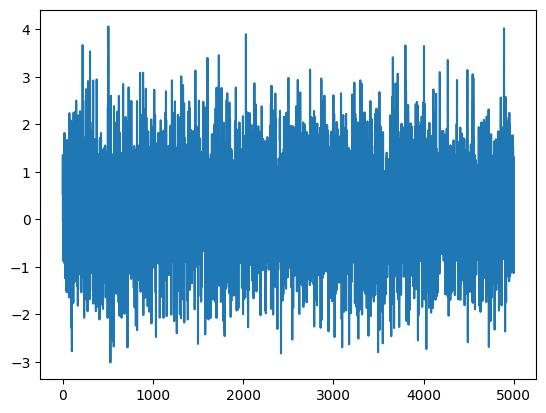

In [61]:
plt.plot(pd.DataFrame(drift_walk).diff())